# Ex 5--


In [8]:
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 78kB/s 
     |████████████████████████████████| 450kB 43.7MB/s 
     |████████████████████████████████| 3.8MB 49.6MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstalled tensorflow-1.15.0


In [0]:
import tensorflow as tf
import numpy as np

In [11]:
row_1 = tf.constant([1, 3, 3, 2])
row_2 = tf.constant([3, 3, 3, 3])
row_3 = tf.constant([3, 3, 3, 2])
row_4 = tf.constant([1, 2, 3, 1])

print(row_1, row_2, row_3, row_4)

tf.Tensor([1 3 3 2], shape=(4,), dtype=int32) tf.Tensor([3 3 3 3], shape=(4,), dtype=int32) tf.Tensor([3 3 3 2], shape=(4,), dtype=int32) tf.Tensor([1 2 3 1], shape=(4,), dtype=int32)


In [12]:
row_all = tf.stack([row_1, row_2, row_3, row_4])
print(row_all)

tf.Tensor(
[[1 3 3 2]
 [3 3 3 3]
 [3 3 3 2]
 [1 2 3 1]], shape=(4, 4), dtype=int32)


In [13]:
row_mean = tf.math.reduce_mean(tf.cast(row_all, tf.float32), axis=1)
row_std = tf.math.reduce_std(tf.cast(row_all, tf.float32), axis=1)
print(row_mean)
print(row_std)

tf.Tensor([2.25 3.   2.75 1.75], shape=(4,), dtype=float32)
tf.Tensor([0.8291562 0.        0.4330127 0.8291562], shape=(4,), dtype=float32)


In [14]:
row_samples = tf.random.normal((3, 4), mean=row_mean, stddev=row_std)
print(row_samples)

tf.Tensor(
[[1.944572  3.        2.4350853 2.6285615]
 [1.7335504 3.        2.0393732 2.4383736]
 [2.8028297 3.        3.1509073 3.366663 ]], shape=(3, 4), dtype=float32)


In [15]:
row_sample_min = tf.reduce_min(row_samples, axis=1)
print(row_sample_min)

tf.Tensor([1.944572  1.7335504 2.8028297], shape=(3,), dtype=float32)


In [16]:
row_sample_max = tf.reduce_max(row_samples, axis=1)
print(row_sample_max)

tf.Tensor([3.       3.       3.366663], shape=(3,), dtype=float32)


In [17]:
row_augmented = tf.round(row_samples)
row_augmented1 = tf.concat([tf.cast(row_all, tf.float32), row_augmented], axis=0)
print(row_augmented1)
print(row_augmented1.shape)

tf.Tensor(
[[1. 3. 3. 2.]
 [3. 3. 3. 3.]
 [3. 3. 3. 2.]
 [1. 2. 3. 1.]
 [2. 3. 2. 3.]
 [2. 3. 2. 2.]
 [3. 3. 3. 3.]], shape=(7, 4), dtype=float32)
(7, 4)


# Ex 4 ---Pytouch

In [37]:
! pip install torch torchvision

In [0]:
import torch
from torch import nn  
import numpy as np

In [0]:
row_1 = torch.tensor([1.0,3.0,3.0,2.0])
row_2 = torch.tensor([3.0,3.0,3.0,3.0])
row_3 = torch.tensor([3.0,3.0,3.0,2.0])
row_4 =torch.tensor([1.0,2.0,3.0,1.0])

In [40]:
list_tensor = [row_1, row_2, row_3, row_4]
row_all = torch.stack(list_tensor)
row_all

tensor([[1., 3., 3., 2.],
        [3., 3., 3., 3.],
        [3., 3., 3., 2.],
        [1., 2., 3., 1.]])

In [41]:
row_mean = torch.mean(row_all, 1)
row_mean


tensor([2.2500, 3.0000, 2.7500, 1.7500])

In [42]:
row_std = torch.std(row_all,1)
row_all

tensor([[1., 3., 3., 2.],
        [3., 3., 3., 3.],
        [3., 3., 3., 2.],
        [1., 2., 3., 1.]])

In [0]:
import torch.distributions as tdist
from torch.distributions import normal

In [44]:
row_sample1 = torch.empty(4).normal_(mean=2.25,std=0.829)
row_sample2 = torch.empty(4).normal_(mean=3,std=0.0001)
row_sample3 = torch.empty(4).normal_(mean=2.75,std=0.4330)
row_sample4 = torch.empty(4).normal_(mean=1.57,std=0.8291)
row_sample = torch.stack((row_sample1,row_sample2, row_sample3, row_sample4) )
print(row_sample)

tensor([[0.0580, 3.3158, 3.3601, 1.6035],
        [3.0000, 3.0000, 2.9997, 3.0001],
        [2.9077, 1.8687, 2.5717, 2.6317],
        [1.3234, 2.0227, 0.8583, 0.3570]])


In [45]:

torch.max(row_sample, axis = 1)

torch.return_types.max(values=tensor([3.3601, 3.0001, 2.9077, 2.0227]), indices=tensor([2, 3, 0, 1]))

In [46]:
torch.min(row_sample, axis = 1)

torch.return_types.min(values=tensor([0.0580, 2.9997, 1.8687, 0.3570]), indices=tensor([0, 2, 1, 3]))

In [47]:
row_augmented = torch.round(row_sample)

row_augmented1 = torch.cat([row_all.float(), row_augmented ], axis=0)
print(row_augmented1)
print(row_augmented1.shape)

tensor([[1., 3., 3., 2.],
        [3., 3., 3., 3.],
        [3., 3., 3., 2.],
        [1., 2., 3., 1.],
        [0., 3., 3., 2.],
        [3., 3., 3., 3.],
        [3., 2., 3., 3.],
        [1., 2., 1., 0.]])
torch.Size([8, 4])


# EX -3 --- Matrix / Tensor

In [0]:
#Tensor Ex 3

In [18]:
m = 4
n = 5

L = 0
H = 8

x = tf.random.uniform([m,], L, H, dtype=tf.int64)
x

<tf.Tensor: id=31, shape=(4,), dtype=int64, numpy=array([1, 2, 4, 3])>

In [19]:
y =  tf.random.uniform([n,], L, H, dtype=tf.int64)
y

<tf.Tensor: id=35, shape=(5,), dtype=int64, numpy=array([4, 6, 7, 7, 1])>

In [20]:
A  = tf.random.uniform([m,n], L, H, dtype=tf.int64)
A

<tf.Tensor: id=39, shape=(4, 5), dtype=int64, numpy=
array([[7, 0, 5, 6, 7],
       [6, 5, 4, 5, 6],
       [4, 6, 1, 2, 2],
       [7, 5, 5, 3, 1]])>

In [21]:
B  = tf.random.uniform([n,m], L, H, dtype=tf.int64)
B

<tf.Tensor: id=43, shape=(5, 4), dtype=int64, numpy=
array([[5, 7, 2, 5],
       [0, 4, 7, 4],
       [3, 4, 7, 5],
       [7, 1, 7, 1],
       [2, 6, 3, 6]])>

In [0]:
# Dot Product

In [22]:
C = tf.linalg.matmul(A, B)
D = tf.linalg.matmul(B, A) 
P = tf.matmul(tf.transpose(A) ,tf.expand_dims(tf.cast(x, tf.int64), 1))
P = tf.reshape(P, (-1,))
q = tf.matmul(tf.transpose(A) ,tf.expand_dims(tf.cast(y, tf.int64), 1), transpose_a=True)
q = tf.reshape(q, (-1,))
g = tf.matmul(tf.transpose(B) ,tf.expand_dims(tf.cast(x, tf.int64), 1), transpose_a=True)
g = tf.reshape(g, (-1,))
h = tf.matmul(tf.transpose(B) ,tf.expand_dims(tf.cast(y, tf.int64), 1))
h = tf.reshape(h, (-1,))
print(C.shape)
print(D.shape)
print(P.shape)
print(q.shape)
print(g.shape)
print(h.shape)


(4, 4)
(5, 5)
(5,)
(4,)
(5,)
(4,)


In [0]:
#Outer Product

In [23]:
E = tf.tensordot(x, y, axes= 0)
F= tf.tensordot(y, x, axes= 0)
print(E)
print(F)

tf.Tensor(
[[ 4  6  7  7  1]
 [ 8 12 14 14  2]
 [16 24 28 28  4]
 [12 18 21 21  3]], shape=(4, 5), dtype=int64)
tf.Tensor(
[[ 4  8 16 12]
 [ 6 12 24 18]
 [ 7 14 28 21]
 [ 7 14 28 21]
 [ 1  2  4  3]], shape=(5, 4), dtype=int64)


In [0]:
l1_P = tf.linalg.norm(P, 1)
l1_q = tf.linalg.norm(q, 1)
l1_g = tf.linalg.norm(g, 1)
l1_h = tf.linalg.norm(h, 1)
l1_E = tf.linalg.norm(E, 1)
l1_F = tf.linalg.norm(F, 1)
l1_x = tf.linalg.norm(x, 1)
l1_y = tf.linalg.norm(y, 1)

In [25]:
print(l1_P)
print(l1_q)
print(l1_g)
print(l1_h)
print(l1_E)
print(l1_F)
print(l1_x)
print(l1_y)

tf.Tensor(200, shape=(), dtype=int64)
tf.Tensor(425, shape=(), dtype=int64)
tf.Tensor(228, shape=(), dtype=int64)
tf.Tensor(428, shape=(), dtype=int64)
tf.Tensor(250, shape=(), dtype=int64)
tf.Tensor(250, shape=(), dtype=int64)
tf.Tensor(10, shape=(), dtype=int64)
tf.Tensor(25, shape=(), dtype=int64)


In [26]:
print(P)

tf.Tensor([56 49 32 33 30], shape=(5,), dtype=int64)


In [0]:
l2_P = tf.linalg.norm(tf.cast(P, tf.float32), 2)
l2_q = tf.linalg.norm(tf.cast(q, tf.float32), 2)
l2_g = tf.linalg.norm(tf.cast(g, tf.float32), 2)
l2_h = tf.linalg.norm(tf.cast(h, tf.float32), 2)
l2_E = tf.linalg.norm(tf.cast(E, tf.float32), 2)
l2_F = tf.linalg.norm(tf.cast(F, tf.float32), 2)
l2_x = tf.linalg.norm(tf.cast(x, tf.float32), 2)
l2_y = tf.linalg.norm(tf.cast(y, tf.float32), 2)

In [28]:
print(l2_P)
print(l2_q)
print(l2_g)
print(l2_h)
print(l2_E)
print(l2_F)
print(l2_x)
print(l2_y)

tf.Tensor(92.46621, shape=(), dtype=float32)
tf.Tensor(215.69191, shape=(), dtype=float32)
tf.Tensor(102.567055, shape=(), dtype=float32)
tf.Tensor(219.95, shape=(), dtype=float32)
tf.Tensor(67.305275, shape=(), dtype=float32)
tf.Tensor(67.305275, shape=(), dtype=float32)
tf.Tensor(5.477226, shape=(), dtype=float32)
tf.Tensor(12.288206, shape=(), dtype=float32)


In [0]:
lP_inf = np.linalg.norm(P, np.infty)
lq_inf = np.linalg.norm(q, np.infty)
lg_inf = np.linalg.norm(g, np.infty)
lh_inf = np.linalg.norm(h, np.infty)
lE_inf = np.linalg.norm(E, np.infty)
lF_inf = np.linalg.norm(F, np.infty)
lx_inf = np.linalg.norm(x, np.infty)
ly_inf = np.linalg.norm(y, np.infty)

In [30]:
print(lP_inf)
print(lq_inf)
print(lg_inf)
print(lh_inf)
print(lx_inf)
print(ly_inf)

56.0
123.0
54.0
151.0
4.0
7.0


In [0]:
#frobenious norm**

In [31]:
forbenious_norm_C =  tf.linalg.norm(tf.cast(C, tf.float32))
forbenious_norm_D =  tf.linalg.norm(tf.cast(D, tf.float32))
forbenious_norm_P =  tf.linalg.norm(tf.cast(P, tf.float32))
forbenious_norm_q =  tf.linalg.norm(tf.cast(g, tf.float32))
forbenious_norm_q =  tf.linalg.norm(tf.cast(q, tf.float32))
forbenious_norm_h =  tf.linalg.norm(tf.cast(h, tf.float32))
forbenious_norm_E = tf.linalg.norm(tf.cast(E, tf.float32))
forbenious_norm_F = tf.linalg.norm(tf.cast(F, tf.float32))
print(forbenious_norm_C)
print(forbenious_norm_D)
print(forbenious_norm_P)
print(forbenious_norm_q)
print(forbenious_norm_q)
print(forbenious_norm_h)
print(forbenious_norm_E)
print(forbenious_norm_F)

tf.Tensor(388.48038, shape=(), dtype=float32)
tf.Tensor(378.24066, shape=(), dtype=float32)
tf.Tensor(92.46621, shape=(), dtype=float32)
tf.Tensor(215.69191, shape=(), dtype=float32)
tf.Tensor(215.69191, shape=(), dtype=float32)
tf.Tensor(219.95, shape=(), dtype=float32)
tf.Tensor(67.305275, shape=(), dtype=float32)
tf.Tensor(67.305275, shape=(), dtype=float32)


In [0]:
#Trace

In [32]:
trace_C = tf.linalg.trace(C)
trace_D = tf.linalg.trace(D)
trace_E = tf.linalg.trace(E)
trace_F = tf.linalg.trace(F)
print(trace_C)
print(trace_D)
print(trace_E)
print(trace_F)

tf.Tensor(391, shape=(), dtype=int64)
tf.Tensor(391, shape=(), dtype=int64)
tf.Tensor(65, shape=(), dtype=int64)
tf.Tensor(65, shape=(), dtype=int64)


In [0]:
# cant compute the trace of one dimentional array hence;

#trace_P = tf.linalg.trace(P)
#trac_q= tf.linalg.trace(q)
#trace_g = tf.linalg.trace(g)
#trace_h = tf.linalg.trace(h)

In [0]:
#Det or the determinant of the matrix

In [33]:
det_C = tf.linalg.det(tf.cast(C, tf.float32))
det_D = tf.linalg.det(tf.cast(D, tf.float32))
print(det_C)
print(det_D)

tf.Tensor(51923.996, shape=(), dtype=float32)
tf.Tensor(-0.7291478, shape=(), dtype=float32)


In [34]:
inver_C = tf.linalg.inv(tf.cast(C, tf.float32))
inver_D = tf.linalg.inv(tf.cast(D, tf.float32))
print(inver_C)
print(inver_D)

tf.Tensor(
[[ 0.00417922 -0.01873902 -0.0832755   0.07724753]
 [ 0.12445108 -0.3322161   0.26669738  0.07453192]
 [-0.06120479  0.01636998 -0.10299662  0.1267622 ]
 [-0.06619292  0.3613165  -0.10037748 -0.28801703]], shape=(4, 4), dtype=float32)
tf.Tensor(
[[ -27648.83     11629.838   -55297.18     27209.844    56833.484 ]
 [   2073.7004    -872.1406    4147.1914   -2040.7408   -4262.5186]
 [ -22118.8       9304.097   -44238.02     21767.75     45466.703 ]
 [ 116815.58    -49136.94    233631.61   -114961.41   -240121.16  ]
 [ -56679.66     23841.732  -113359.89     55780.12    116508.445 ]], shape=(5, 5), dtype=float32)


In [0]:
#THE DET IS EQUAL TO ZERO SO THERE IS NO INVERSE, hence;

#det_P = tf.linalg.det(P)
#det_q = tf.linalg.det(q)
#det_g = tf.linalg.det(g)
#det_h = tf.linalg.det(h) 


#CAN NOT FIND THE DET AND INVERSE

# EX-2 --Numpy/Pandas


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from google.colab import drive 
drive.mount('/content/gdrive')     #mounting google drive path

train_df=pd.read_csv('/content/gdrive/My Drive/train.csv') #Read a comma-separated values (csv) file into DataFrame.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
train_df.info() #returns concise summary about the DataFram


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [0]:
train_df.head() #returns the first 'n' rows

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [0]:
train_df[['lstat', "medv"]].head()    #

,lstat,medv
0,4.98,24.0
1,9.14,21.6
2,2.94,33.4
3,5.33,36.2
4,12.43,22.9


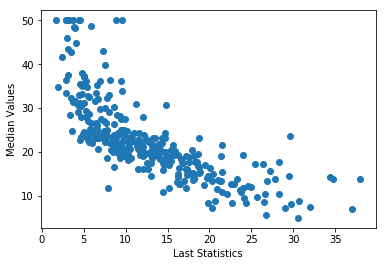

In [0]:
_lstat=train_df["lstat"].values
_medv=train_df["medv"].values

plt.scatter(_lstat, _medv)
plt.xlabel("Last Statistics")
plt.ylabel("Median Values")

plt.show()                                       #Scatter diagram

In [0]:
_ls=np.linspace(min(_lstat), max(_lstat)).reshape(-1, 1)
_mv=np.linspace(min(_medv), max(_medv)).reshape(-1, 1)



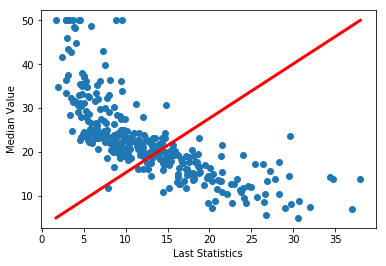

In [0]:
plt.scatter(_lstat, _medv)
plt.plot(_ls, _mv, color='red', linewidth=3)
plt.xlabel('Last Statistics')
plt.ylabel('Median Value')
plt.show()                                   # Line of best fit                                        

In [0]:
train_df['constant'] = 1
columns = ['constant', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat']
x = train_df[columns].values

In [0]:
y = train_df['medv'].values
y.reshape(-1, 1)


array([[24. ],
       [21.6],
       [33.4],
       [36.2],
       [22.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [20.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [14.8],
       [12.7],
       [14.5],
       [13.5],
       [24.7],
       [30.8],
       [34.9],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [19.4],
       [19.7],
       [20.5],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [18.7],
       [16. ],
       [25. ],
       [33. ],
       [23.5],
       [19.4],
       [22. ],
       [17.4],
       [24.2],
       [22.8],
       [23.4],
       [24.1],
       [21.4],
       [20. ],
       [20.8],
       [28. ],
       [23.9],
       [22.9],
       [23.9],
       [26.6],
       [22.5],
       [22.2],
       [23.6],
       [28.7],
       [22.6],
       [25. ],
       [20.6],
       [21

In [0]:
x

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [1.0000e+00, 3.2370e-02, 0.0000e+00, ..., 1.8700e+01, 3.9463e+02,
        2.9400e+00],
       ...,
       [1.0000e+00, 4.5270e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        9.0800e+00],
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [0]:
w = np.zeros([x.shape[1], 1])

In [0]:
def pred(x, w):
    return np.dot(x, w)

In [0]:
y_pred = pred(x, w)

In [0]:
def loss(_w):
    p = pred(x, _w)
    e = y - p
    se = np.power(e, 2)
    rse = np.sqrt(np.sum(se))
    rmse = rse / y.shape[0]
    return rmse

In [0]:
l = loss(w)

In [0]:
l

24.54214001746051

In [0]:
se_cols = ['chas', 'nox', 'rm', 'dis', 'ptratio', 'lstat']
#predictors = train_df.drop('_mv', axis=1)
predictors = train_df[['_lstat']]
target = train_df['_mv']
print(predictors.shape)
print(target.shape)

# Ex 1 Data Structures
.. 

In [0]:
simple_List=[]

In [0]:
simple_List=[10, 11, 11, 4]

In [0]:
print(simple_List[0])

10


In [0]:
#adding number of empty seats
simple_List[0] + 1

11

In [0]:
#adding number of empty seats
simple_List[1] += 1


In [0]:
#adding number of empty seats
simple_List[2] +1

12

In [0]:
#adding number of empty seats
simple_List[3] + 5

9

In [0]:
list_roll1=[4, 6]
list_roll2=[4, 5]
list_roll3=[3, 9]
list_roll4=[1, 3]
print(list_roll1)
print(list_roll2)
print(list_roll2)
print(list_roll4)

[4, 6]
[4, 5]
[4, 5]
[1, 3]


In [0]:
#nested list
nested_list=[list_roll1, list_roll2, list_roll3, list_roll4]
print(nested_list)

[[4, 6], [4, 5], [3, 9], [1, 3]]


In [0]:
flat_list=[]

In [0]:
for i in nested_list:
  for item in i:
    flat_list.append(item)
print(flat_list)


[4, 6, 4, 5, 3, 9, 1, 3]


In [0]:
#adding two simple lists

sum(simple_List[0:3]) + sum(simple_List[1:])

58

26

In [0]:
#adding the first 3rolls to the last 3rolls
sum(simple_List[0:3] + simple_List[1:5])

58

In [0]:
simple_List[0:3]

[10, 11, 11]

In [0]:
simple_List[1:]

[11, 11, 4]

In [0]:
simple_List[:3] + simple_List[-3:]

[10, 12, 11, 12, 11, 4]

In [0]:
simple_List[0:3]

[10, 11, 11]

In [0]:
#reverse
simple_List[::-1]

[4, 11, 11, 10]

In [0]:
simple_tuple=(10, 11, 11, 4)

In [0]:
#cant add to tuple
simple_tuple[0]+=1 


TypeError: ignored

In [0]:
simple_tuple=(simple_List)
print(simple_tuple)

[10, 11, 11, 4]


In [0]:
nested_tuple=(nested_list)

In [0]:
print(nested_tuple)

[[4, 6], [4, 5], [3, 9], [1, 3]]


In [0]:
#creating a dictionary
simple_dict= {}

In [0]:
#Boot-Camp Day 3 -------NUMPY / PANDAS



import numpy as np

row_1=np.array([1, 3, 3, 2]) #creating row1

row_1


array([1, 3, 3, 2])

In [0]:
row_2=np.array([3, 3, 3, 3]) #creating row
row_2

array([3, 3, 3, 3])

In [0]:
row_3=np.array([3, 3, 3, 2]) #creating row3
row_3

array([3, 3, 3, 2])

In [0]:
row_4=np.array([1, 2, 3, 1]) #creating row4
row_4

array([1, 2, 3, 1])

In [0]:
row_all=np.vstack((row_1, row_2, row_3, row_4)) #stacking all rows

In [0]:

row_all

array([[1, 3, 3, 2],
       [3, 3, 3, 3],
       [3, 3, 3, 2],
       [1, 2, 3, 1]])

In [0]:
row_mean=row_all.mean(axis=1) #finding the mean of rows

row_mean

array([2.25, 3.  , 2.75, 1.75])

In [0]:
row_std=row_all.std(axis=1) #finding the Standard deviation of all rows

row_std

array([0.8291562, 0.       , 0.4330127, 0.8291562])

In [0]:
row_samples = np.random.normal(row_mean, row_std, (4, 4)) #generating a 2D sample row

In [0]:
row_samples


array([[2.6739328 , 3.        , 2.95685613, 1.62616648],
       [1.5241798 , 3.        , 1.76901462, 1.27979262],
       [3.46369385, 3.        , 3.27408109, 2.82385147],
       [1.84193595, 3.        , 2.61100311, 0.61502248]])

In [0]:
min_row_samples = row_samples.min(axis=0) #finding the mean

min_row_samples


array([1.5241798 , 3.        , 1.76901462, 0.61502248])

In [0]:
max_row_samples = row_samples.max(axis=0)  #finding the Max
max_row_samples

array([3.46369385, 3.        , 3.27408109, 2.82385147])

In [0]:
rounded_sample=np.round(row_samples) #rounding the row_samples
rounded_sample

array([[3., 3., 3., 2.],
       [2., 3., 2., 1.],
       [3., 3., 3., 3.],
       [2., 3., 3., 1.]])

In [0]:

row_augmented = np.concatenate((row_all, rounded_sample),axis=1) #concatenation
row_augmented

array([[1., 3., 3., 2., 3., 3., 3., 2.],
       [3., 3., 3., 3., 2., 3., 2., 1.],
       [3., 3., 3., 2., 3., 3., 3., 3.],
       [1., 2., 3., 1., 2., 3., 3., 1.]])

In [0]:
import matplotlib.pyplot as plt

row_aug_flat=row_augmented.flatten()   #flatten

row_aug_flat

array([1., 3., 3., 2., 3., 3., 3., 2., 3., 3., 3., 3., 2., 3., 2., 1., 3.,
       3., 3., 2., 3., 3., 3., 3., 1., 2., 3., 1., 2., 3., 3., 1.])

(array([ 5.,  0.,  0.,  0.,  0.,  7.,  0.,  0.,  0., 20.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

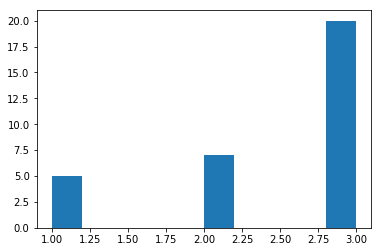

In [0]:
plt.hist(row_aug_flat)

In [0]:
import pandas as pd


In [0]:
row_dict = {"row_1": row_augmented[0], "row_2": row_augmented[1], "row_3": row_augmented[2], "row_4": row_augmented[3]}
row_dict

{'row_1': array([1., 3., 3., 2., 3., 3., 3., 2.]),
 'row_2': array([3., 3., 3., 3., 2., 3., 2., 1.]),
 'row_3': array([3., 3., 3., 2., 3., 3., 3., 3.]),
 'row_4': array([1., 2., 3., 1., 2., 3., 3., 1.])}

In [0]:
row_aug_data=pd.DataFrame(row_dict)
row_aug_data

,row_1,row_2,row_3,row_4
0,1.0,3.0,3.0,1.0
1,3.0,3.0,3.0,2.0
2,3.0,3.0,3.0,3.0
3,2.0,3.0,2.0,1.0
4,3.0,2.0,3.0,2.0
5,3.0,3.0,3.0,3.0
6,3.0,2.0,3.0,3.0
7,2.0,1.0,3.0,1.0


In [0]:
row_aug_data_Mean=row_aug_data.mean(axis=1)
row_aug_data_Mean


0    2.00
1    2.75
2    3.00
3    2.00
4    2.50
5    3.00
6    2.75
7    1.75
dtype: float64

In [0]:
row_aug_data_Median=row_aug_data.median(axis=1)
row_aug_data_Median

0    2.0
1    3.0
2    3.0
3    2.0
4    2.5
5    3.0
6    3.0
7    1.5
dtype: float64

In [0]:
row_aug_data_Mode=row_aug_data.mode(axis=1)
row_aug_data_Mode

,0,1
0,1.0,3.0
1,3.0,NaN
2,3.0,NaN
3,2.0,NaN
4,2.0,3.0
5,3.0,NaN
6,3.0,NaN
7,1.0,NaN


In [0]:
row_aug_data_var=row_aug_data.var(axis=1)
row_aug_data_var

0    1.333333
1    0.250000
2    0.000000
3    0.666667
4    0.333333
5    0.000000
6    0.250000
7    0.916667
dtype: float64

In [0]:
row_aug_data_std=row_aug_data.std(axis=1)
row_aug_data_std

0    1.154701
1    0.500000
2    0.000000
3    0.816497
4    0.577350
5    0.000000
6    0.500000
7    0.957427
dtype: float64

In [0]:
row_aug_data_min=row_aug_data.min(axis=1)
row_aug_data_min

0    1.0
1    2.0
2    3.0
3    1.0
4    2.0
5    3.0
6    2.0
7    1.0
dtype: float64

In [0]:
row_aug_data_Max=row_aug_data.max(axis=1)
row_aug_data_Max

0    3.0
1    3.0
2    3.0
3    3.0
4    3.0
5    3.0
6    3.0
7    3.0
dtype: float64

In [0]:
#plt.bar(row_aug_data, )

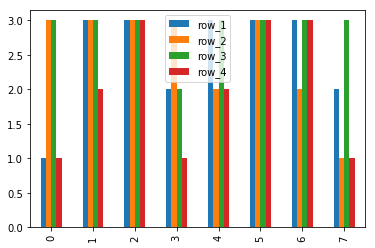

In [0]:
row_aug_data.plot.bar()